In [1]:
import numpy as np

from utils import iotools
from utils import heatmaps as hmap
from utils import stats as mytools

selected_teams = ['CRY', 'LEI', 'WHU', 'BUR', 'NEW', 'WOL', 'BHA', 'BOU', 'SOU', 'FUL', 'WAT', 'HUD', 'CAR']
startgw = 1
endgw = 10

Teams   MCI  LIV  CHE  TOT  ARS  MNU  EVE  CRY  LEI  WHU  BUR  NEW  WOL  BHA  BOU  SOU  FUL  WAT  HUD  CAR 
# CS     18   16   16   15   15   14   10   10   10   10    9    9    9    9    9    9    9    9    8    8 


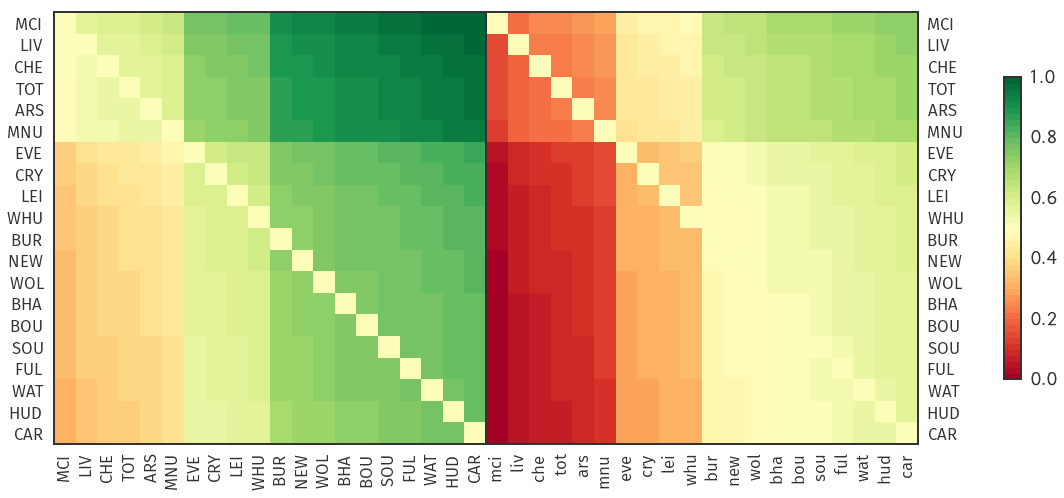

In [2]:
teams, scores = iotools.get_scores('epldifficulties_banskt.csv')
dh, da = iotools.convert_scores_mat(scores, teams, nanval = 0.5)
mytools.predict_cleansheets(teams, dh, da, cutoff = 0.7)
hmap.score(teams, dh, da)

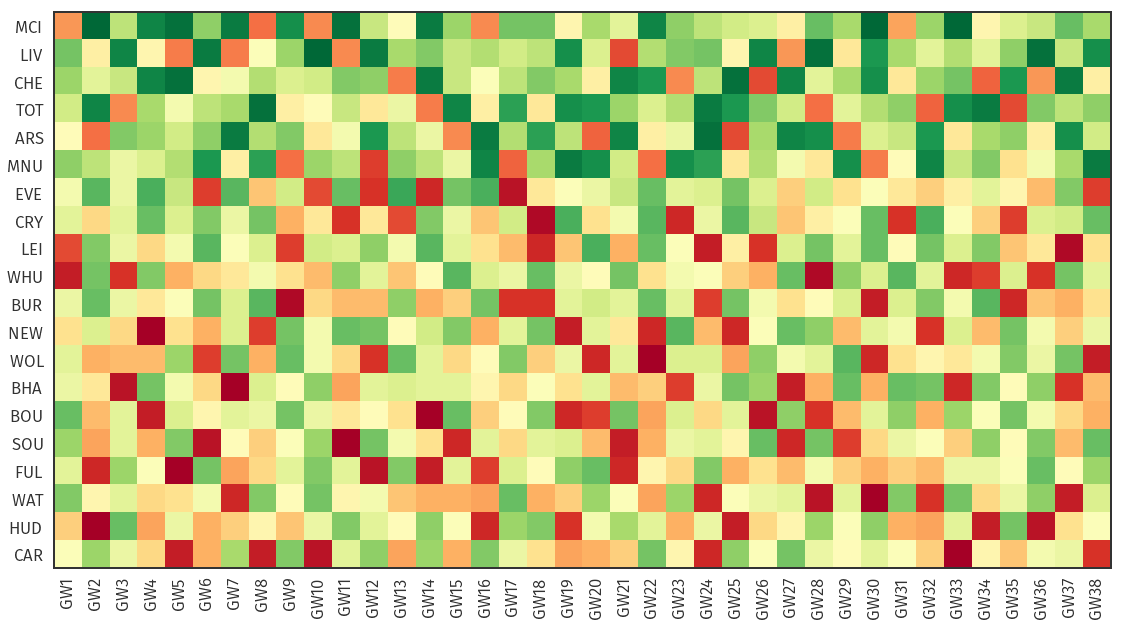

In [3]:
eplfixtures = iotools.get_fixtures('eplfixtures.csv', scores)
hmap.rotation(teams, 1, 38, eplfixtures, annotate = False)

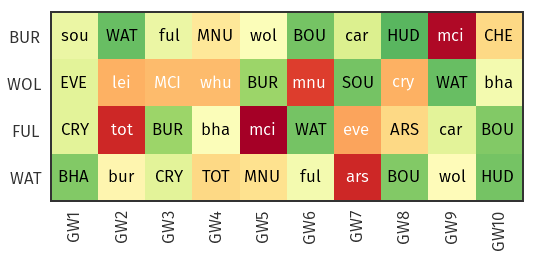

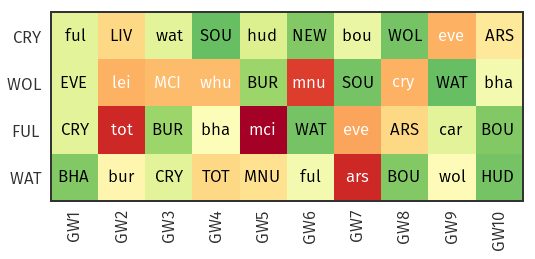

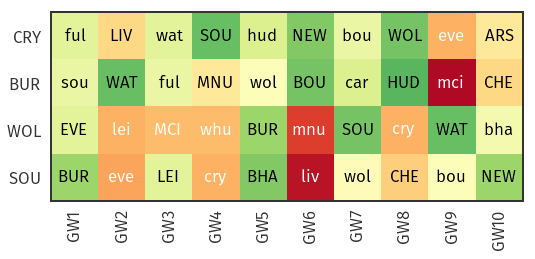

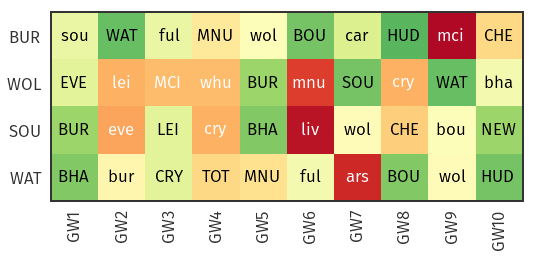

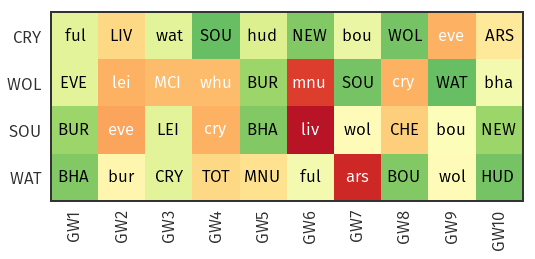

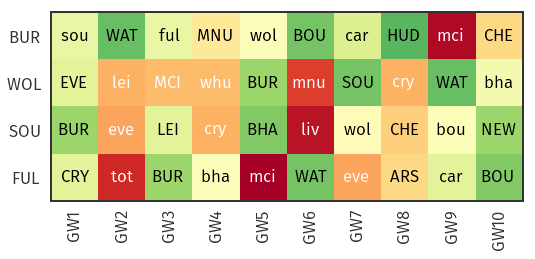

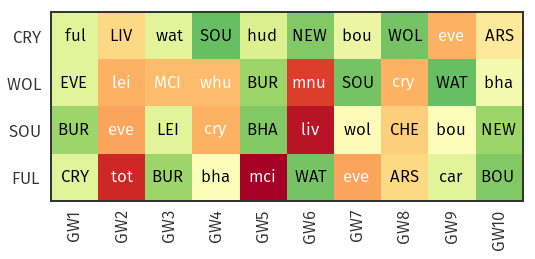

In [4]:
res = mytools.rotate(selected_teams, eplfixtures, startgw, endgw, 4, 2, csprob = 0.7)
max_cleanies = max([x.cleanies for x in res]) - 1
select = [x for x in res if x.cleanies > max_cleanies]

best = sorted(select, key=lambda x: x.score, reverse = True)
best_scores = sorted(res, key=lambda x: x.score, reverse = True)[:10]

for x in best:
    hmap.rotation(x.teams, startgw, endgw, eplfixtures)